In [1]:
# Loading
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
%matplotlib inline

# 1. User Input

## 1.1 Import Pareto set

Import Pareto set. 
Enter datframe containing results.

In [2]:
opdata = pd.read_pickle("Data/opdata")

## 1.2 Import objective functions

In [3]:
# individually
obj1 = pd.read_pickle("Data/obj1")
obj2 = pd.read_pickle("Data/obj2")
obj3 = pd.read_pickle("Data/obj3")

# as dataframe
objdf = pd.read_pickle("Data/objdf")

Import normalised objective functions, where 1 is preferred, 0 is least preferred

In [4]:
onenormobj1 = pd.read_pickle("Data/onenormobj1")
onenormobj2 = pd.read_pickle("Data/onenormobj2")
onenormobj3 = pd.read_pickle("Data/onenormobj3")

## 1.3 Extract other variables of interest for plots

In [5]:
desalfull = opdata['Desalination Full Production Threshold']
desalfullname = 'Desalination Full Production Threshold'
desal13 = opdata['Desalination 1/3 Production Threshold']
desal13name = 'Desalination 1/3 Production Threshold'
desal23 = opdata['Desalination 2/3 Production Threshold']
desal23name = 'Desalination 2/3 Production Threshold'
desalprod = opdata['Desalination Total Production Volume (GL)']
desalprodname = 'Desalination Total Production Volume (GL)'

brisbnthpineflow = opdata['Brisbane to Nth Pine Flow Threshold']

## 1.4 Enter chart axis names

Objective names for charts
(including arrows for direction of preference, right is maximised, left is minimised)

In [6]:
obj1chartname = 'Minimum Storage (GL) %s' % r'$\longrightarrow$'
obj2chartname = '%s Total Cost (%s million)' % (r'$\longleftarrow$', r'$\$$')
obj3chartname = '%s Total Spill (GL)' % r'$\longleftarrow$'

## 1.5 Enter tick points for chart (if desired)

In [7]:
obj1ticks = [150,250,350,450]
obj2ticks = [5200,5300,5400,5500]
obj3ticks = [350,400,450,500,550,600]

desalprodticks = [0,100,200,300,400,500]
desalfullticks = [0,0.2,0.4,0.6,0.8]
desal13ticks = [0,0.2,0.4,0.6,0.8,1.0]
desal23ticks = [0,0.2,0.4,0.6,0.8,1.0]

# 2. Create Scatterplot of objective performance

## 2.1 3D scatterplot of objective function performance of Pareto set

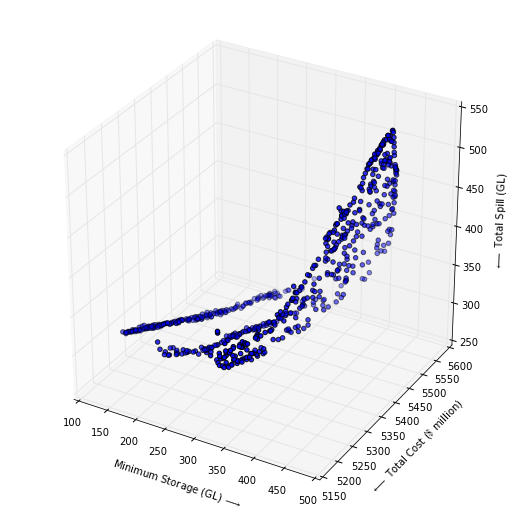

In [8]:
fig = plt.figure(figsize = [7,7])
ax = fig.add_subplot(1,1,1)
ax = Axes3D(fig)
ax.scatter(obj1, obj2, obj3, c = 'blue')
ax.set_xlabel(obj1chartname, labelpad = 10) 
    #labelpad improves space bet. axis and label
ax.set_ylabel(obj2chartname, labelpad = 10)
ax.set_zlabel(obj3chartname, labelpad = 10)

# save file
plt.savefig('Scatterplots/scatterplot pareto front.png', dpi = 150)

In [9]:
plt.close(fig)

# 3. Create decision map matrix of objective performance

## 3.1 Decision maps of objective function performance of Pareto set

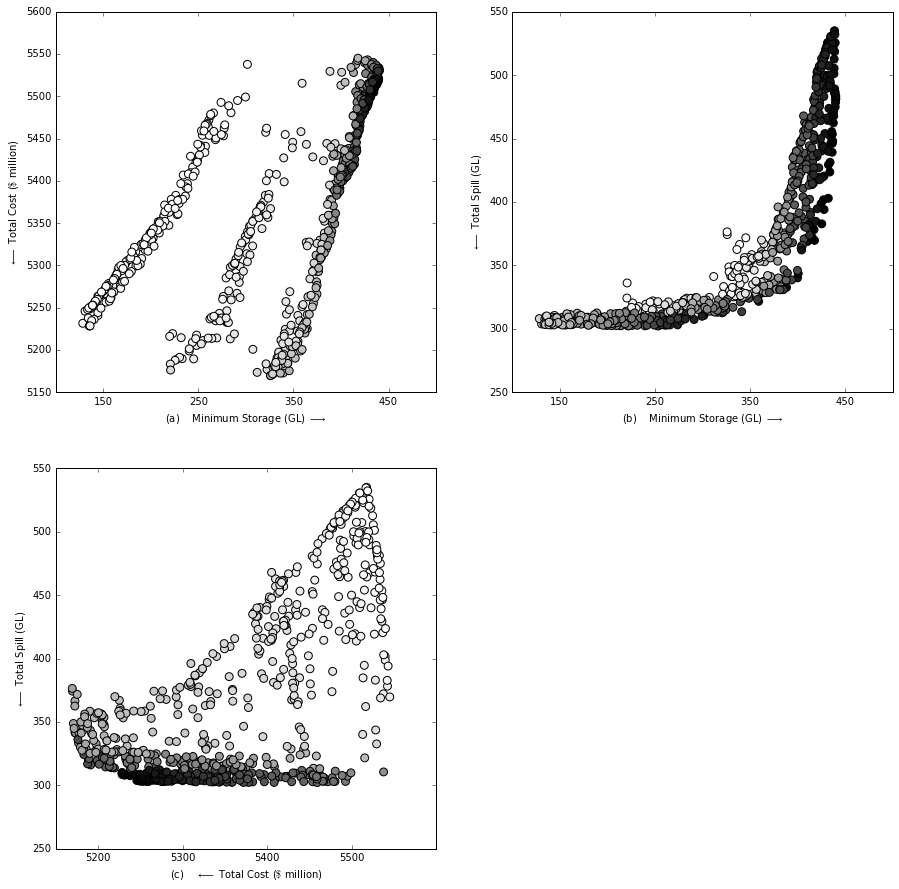

In [10]:
fig = plt.figure(figsize = [15,15])
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(obj1, obj2, c = onenormobj3, marker = '.', s = 250, cmap = 'gray')
ax1.set_xlabel('%s    %s' % ('(a)', obj1chartname))
ax1.set_xticks(obj1ticks)
ax1.set_ylabel(obj2chartname)

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(obj1, obj3, c = onenormobj2, marker = '.', s = 250, cmap = 'gray')
ax2.set_xlabel('%s    %s' % ('(b)', obj1chartname))
ax2.set_xticks(obj1ticks)
ax2.set_ylabel(obj3chartname)

ax3 = fig.add_subplot(2,2,3)
ax3.scatter(obj2, obj3, c = onenormobj1, marker = '.', s = 250, cmap = 'gray')
ax3.set_xlabel('%s    %s' % ('(c)', obj2chartname))
ax3.set_xticks(obj2ticks)
ax3.set_ylabel(obj3chartname)

plt.savefig('Decision Maps/decision maps pareto front.png', dpi = 150, bbox_inches = 'tight')

In [11]:
plt.close(fig)

## 3.2 Decision map of objective function performance of obj1 vs obj2, with obj3 as shading

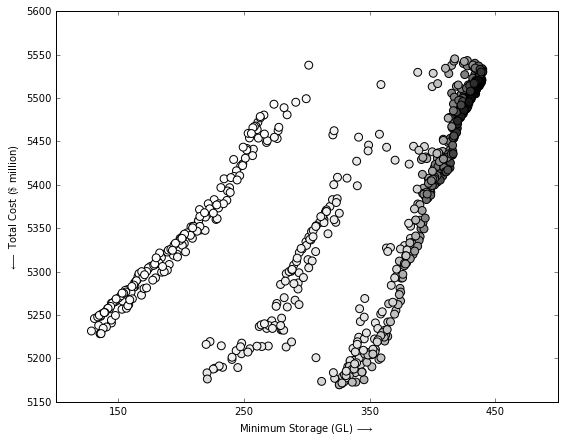

In [12]:
fig = plt.figure(figsize = [9,7])
ax = fig.add_subplot(1,1,1)
ax.scatter(obj1, obj2, c = onenormobj3, marker = '.', s = 250, cmap = 'gray')
ax.set_xlabel(obj1chartname)
ax.set_xticks(obj1ticks)
ax.set_ylabel(obj2chartname)

plt.savefig('Decision Maps/decision map pareto front obj1 obj2.png', dpi = 150, bbox_inches = 'tight')

In [13]:
plt.close(fig)

# 4. Glyph plots

## 4.1 Glyph plot showing Brisbane to Nth Pine Flow Threshold in addition to objective functions

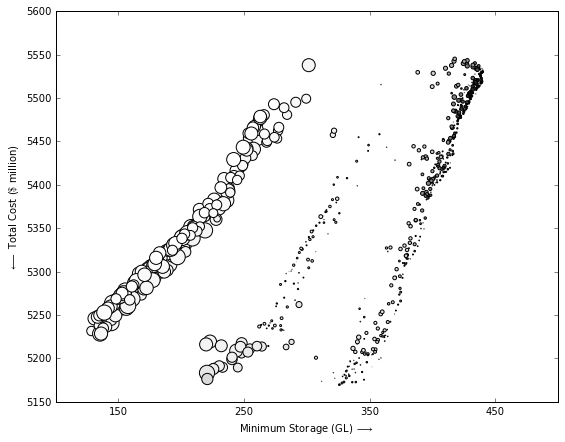

In [15]:
fig = plt.figure(figsize = [9,7])
ax = fig.add_subplot(1,1,1)
ax.scatter(obj1, obj2, c = onenormobj3, marker = '.', s = brisbnthpineflow*1000, cmap = 'gray')
ax.set_xlabel(obj1chartname)
ax.set_xticks(obj1ticks)
ax.set_ylabel(obj2chartname)

plt.savefig('Glyph Plot/glyph plot pareto front brisbnthpineflow.png', dpi = 150, bbox_inches='tight')

In [16]:
plt.close(fig)

# 5. Scatterplots of desalination decision variable and production volume vs objective functions

Scatterplots of desalination full decision variable vs objectives

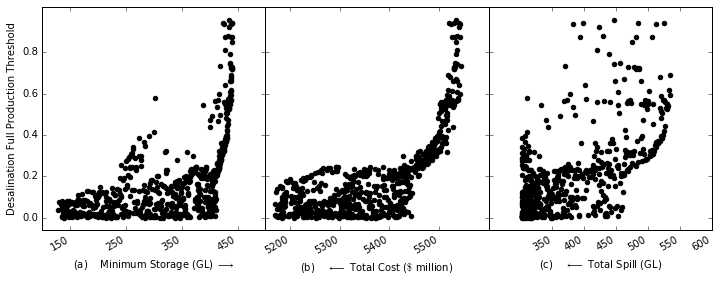

In [17]:
fig, axes = plt.subplots(1, 3, sharey = True, figsize = [12,4])

axes[0].scatter(obj1, desalfull, c = 'black')
axes[0].set_xlabel('%s    %s' % ('(a)', obj1chartname))
axes[0].set_xticks(obj1ticks)
axes[0].set_xticklabels(obj1ticks, rotation = 30, horizontalalignment = 'right')
axes[0].set_ylabel(desalfullname)
axes[0].set_yticks(desalfullticks)

axes[1].scatter(obj2, desalfull, c = 'black')
axes[1].set_xlabel('%s    %s' % ('(b)', obj2chartname))
axes[1].set_xticks(obj2ticks)
axes[1].set_xticklabels(obj2ticks, rotation = 30, horizontalalignment = 'right')

axes[2].scatter(obj3, desalfull, c = 'black')
axes[2].set_xlabel('%s    %s' % ('(c)', obj3chartname))
axes[2].set_xticks(obj3ticks)
axes[2].set_xticklabels(obj3ticks, rotation = 30, horizontalalignment = 'right')

plt.subplots_adjust(wspace = 0, hspace = 0)
plt.savefig('Scatterplots/scatterplot desal full obj.png', dpi=150, bbox_inches='tight') 

In [18]:
plt.close(fig)